## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")
print(reg.coef_)

Mean Square Error = 33.45
[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [28]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")
print(ridge.coef_)

Mean Square Error = 34.23
[-1.16807614e-01  4.60034842e-02 -2.37620690e-02  2.27814972e+00
 -8.55779612e+00  3.75513528e+00 -1.04143035e-02 -1.28009479e+00
  2.22037885e-01 -1.15255734e-02 -9.69288272e-01  8.53481709e-03
 -4.98849035e-01]


In [29]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.2f}")
print(lasso.coef_)

Mean Square Error = 41.70
[-0.05889028  0.05317657 -0.          0.         -0.          0.67954962
  0.01684077 -0.6487664   0.198738   -0.01399421 -0.86421958  0.00660309
 -0.73120957]


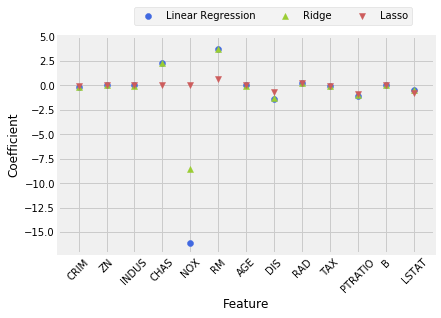

In [44]:
plt.scatter(range(len(reg.coef_)), reg.coef_, marker='o', color='royalblue', label='Linear Regression')
plt.scatter(range(len(reg.coef_)), ridge.coef_, marker='^', color='yellowgreen', label='Ridge')
plt.scatter(range(len(reg.coef_)), lasso.coef_, marker='v', color='indianred', label='Lasso')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(loc=(0.2, 1.05), ncol=3)